# 1.Importing Libraries

In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# 2.Data Analysis

## 2.1 Loading Dataset

In [46]:
dataset=pd.read_csv("heart.csv")

## 2.2 Displaying some rows

In [47]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2.3 checking for Null values

In [48]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2.4 Displaying summary of statistics

In [49]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# 3.Data Visualization

## 3.1 Diagram for showing whether the person have heart disease or not

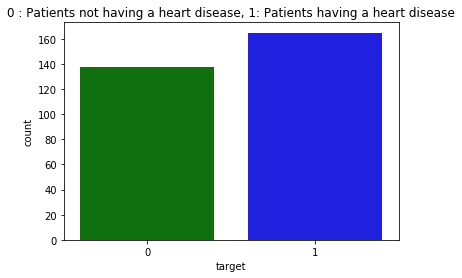

In [50]:
sns.countplot(dataset.target, palette = ['green', 'blue'])
plt.title ("0 : Patients not having a heart disease, 1: Patients having a heart disease")
plt.show()

## 3.2 Diagram for Age X Heart Disease

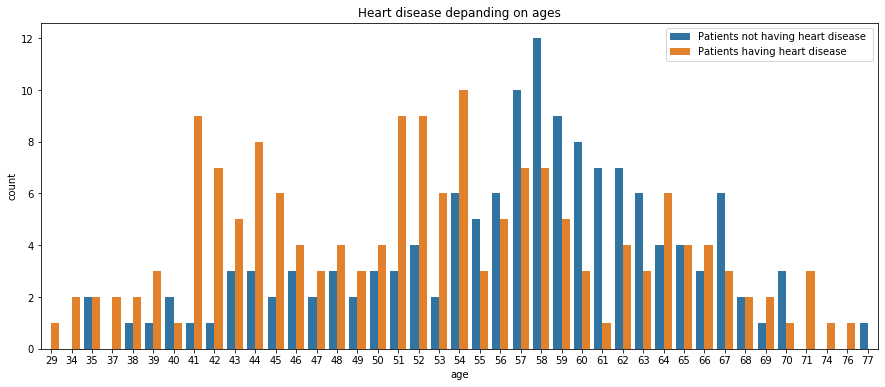

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'age', hue = 'target', data = dataset)
plt.title("Heart disease depanding on ages")
plt.legend(["Patients not having heart disease ","Patients having heart disease "], loc= "upper right")

# 4.Evaluating Models

## 4.1 Creating Training and Test datasets

In [52]:
array = dataset.values
x = array[:,0:13]
y = array[:,13]

In [53]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [54]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

## 4.2 Logistic Regression

In [56]:
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)
predictions_LR = model_LR.predict(x_test)
print (predictions_LR)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]


C:\Users\RIZWAN ASLAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
conf_mat_LR = confusion_matrix(predictions_LR,y_test)
print (" Confusion Matrix for Logistic Regression Model: ")
conf_mat_LR

 Confusion Matrix for Logistic Regression Model: 


array([[30,  7],
       [11, 43]], dtype=int64)

In [58]:
accuracy_LR = accuracy_score(predictions_LR,y_test)
print ("Accuracy for Logistic Regression Model: ")
accuracy_LR

Accuracy for Logistic Regression Model: 


0.8021978021978022

## 4.3 Decision Tree

In [59]:
model_DT = DecisionTreeClassifier()
model_DT.fit (x_train, y_train)
predictions_DT = model_DT.predict(x_test)

In [60]:
predictions_DT

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1.])

In [61]:
conf_mat_DT = confusion_matrix (y_test, predictions_DT)
print (" Confusion Matrix for Decission Tree Model: ")
conf_mat_DT

 Confusion Matrix for Decission Tree Model: 


array([[31, 10],
       [15, 35]], dtype=int64)

In [62]:
accuracy_DT = accuracy_score (y_test, predictions_DT)
print ("Accuracy for Decision Tree Model: ")
accuracy_DT

Accuracy for Decision Tree Model: 


0.7252747252747253

[Text(639.7071428571429, 1032.8400000000001, 'X[2] <= 0.5\ngini = 0.496\nsamples = 212\nvalue = [97, 115]'),
 Text(390.6, 924.1200000000001, 'X[8] <= 0.5\ngini = 0.367\nsamples = 99\nvalue = [75, 24]'),
 Text(239.14285714285714, 815.4000000000001, 'X[11] <= 0.5\ngini = 0.5\nsamples = 43\nvalue = [21, 22]'),
 Text(127.54285714285714, 706.6800000000001, 'X[12] <= 2.5\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(63.77142857142857, 597.96, 'X[7] <= 96.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(31.885714285714286, 489.24, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(95.65714285714286, 489.24, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(191.31428571428572, 597.96, 'X[6] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(159.42857142857144, 489.24, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(223.2, 489.24, 'X[9] <= 0.85\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(191.31428571428572, 380.5200000000001, 'gini = 0.0\nsamples = 3\nvalue = [0,

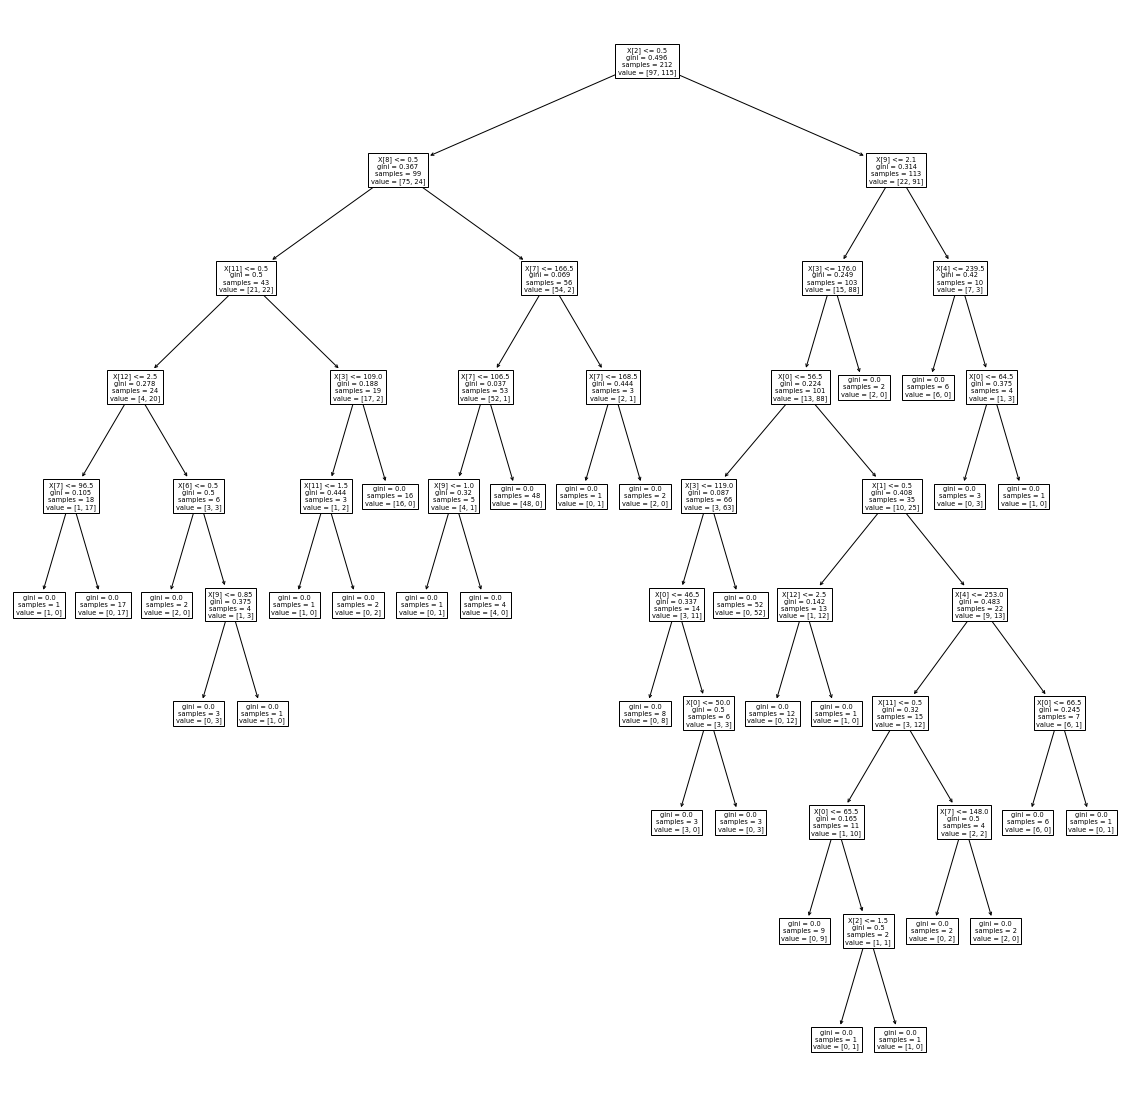

In [91]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(model_DT)

## 4.4 Random Forest

In [92]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train,y_train)
Predictions_RF = model_RF.predict(x_test)

In [94]:
Predictions_RF

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0.])

In [95]:
conf_mat_RF = confusion_matrix (y_test, Predictions_RF)
print (" Confusion Matrix for Random Forest Model: ")
conf_mat_RF

 Confusion Matrix for Random Forest Model: 


array([[31, 10],
       [12, 38]], dtype=int64)

In [96]:
accuracy_RF = accuracy_score (y_test, Predictions_RF)
print ("Accuracy for Random Forest Model: ")
accuracy_RF

Accuracy for Random Forest Model: 


0.7582417582417582

[Text(386.79545454545456, 1032.8400000000001, 'X[2] <= 0.5\ngini = 0.48\nsamples = 146\nvalue = [85, 127]'),
 Text(169.0909090909091, 924.1200000000001, 'X[11] <= 0.5\ngini = 0.429\nsamples = 62\nvalue = [62, 28]'),
 Text(101.45454545454547, 815.4000000000001, 'X[7] <= 156.5\ngini = 0.5\nsamples = 33\nvalue = [25, 26]'),
 Text(67.63636363636364, 706.6800000000001, 'X[4] <= 158.0\ngini = 0.278\nsamples = 20\nvalue = [25, 5]'),
 Text(33.81818181818182, 597.96, 'gini = 0.0\nsamples = 1\nvalue = [0, 3]'),
 Text(101.45454545454547, 597.96, 'X[3] <= 106.0\ngini = 0.137\nsamples = 19\nvalue = [25, 2]'),
 Text(67.63636363636364, 489.24, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(135.27272727272728, 489.24, 'X[9] <= 0.6\ngini = 0.074\nsamples = 18\nvalue = [25, 1]'),
 Text(101.45454545454547, 380.5200000000001, 'X[3] <= 135.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(67.63636363636364, 271.80000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(135.27272727272728, 271

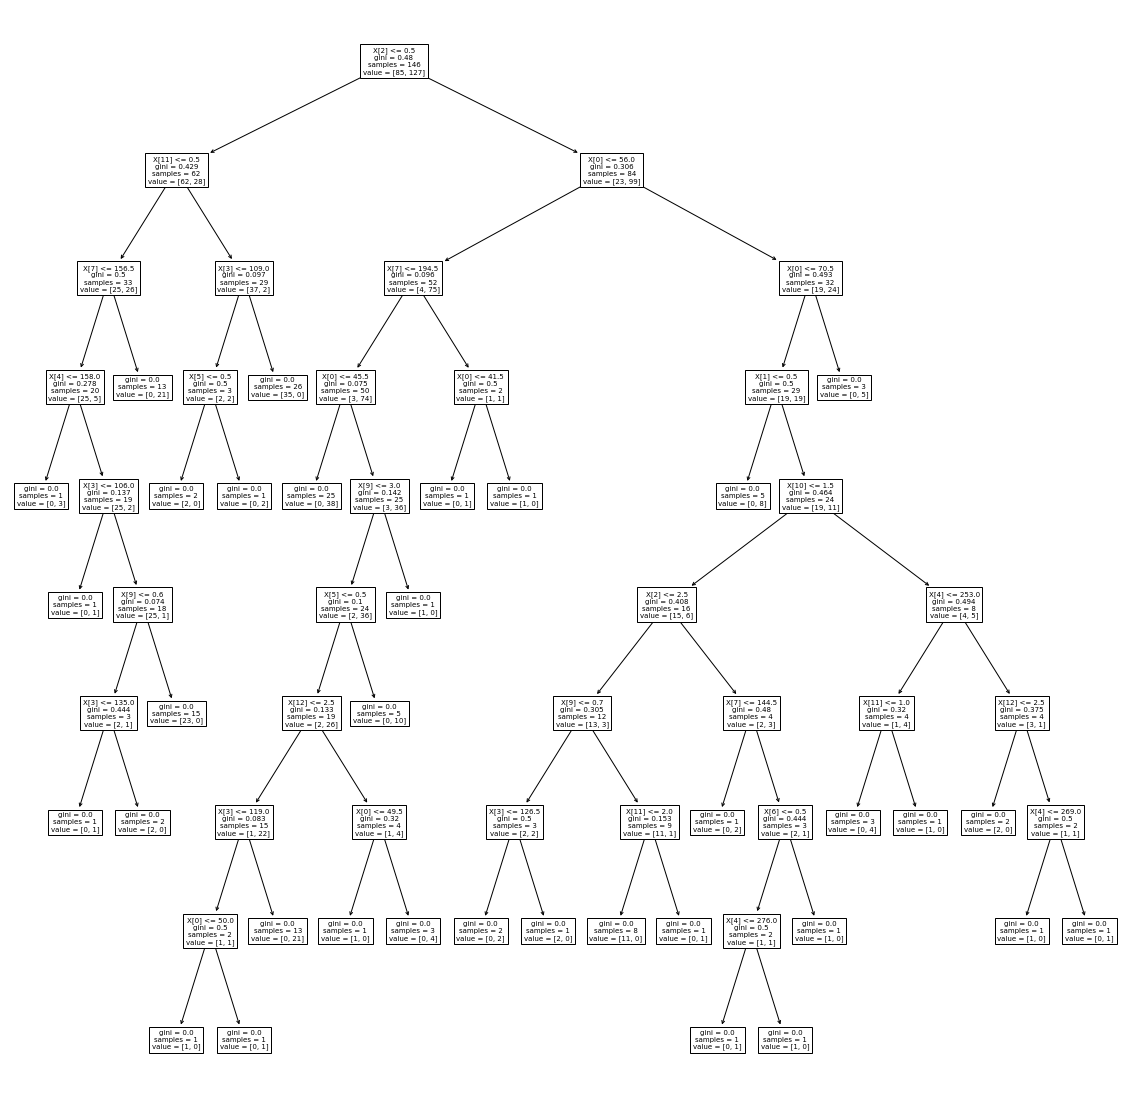

In [100]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(model_RF.estimators_[0])

# 5.Selecting the best model

In [101]:
score = { 'Logistic_Reg': [accuracy_LR] , 'Decision_Tree': [accuracy_DT], 'Random_Forest': [accuracy_RF]}
score_df = pd.DataFrame(score)
score_df

,Logistic_Reg,Decision_Tree,Random_Forest
0,0.802198,0.725275,0.758242


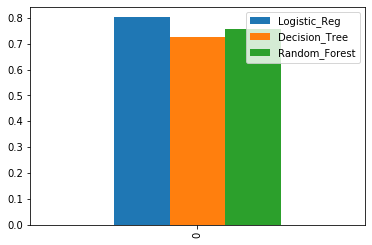

In [102]:
score_df.plot(kind='bar')

In [103]:
conf_mat_final = {'Logistic_Reg': conf_mat_LR, 'Decision_Tree': conf_mat_DT, 'Random_Forest': conf_mat_RF}

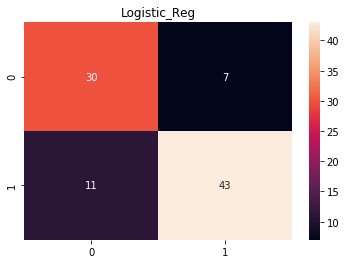

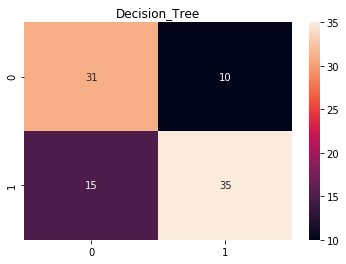

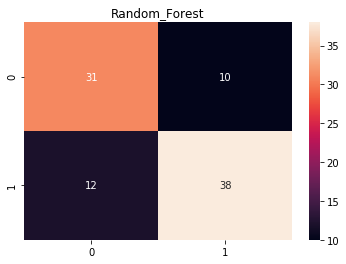

In [104]:
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [105]:
print (" Accuracy for Logistic Regression: ")
print (accuracy_LR)
print (" Accuracy for Decision Tree: ")
print (accuracy_DT)
print (" Accuracy for Random Forest: ")
print (accuracy_RF)

 Accuracy for Logistic Regression: 
0.8021978021978022
 Accuracy for Decision Tree: 
0.7252747252747253
 Accuracy for Random Forest: 
0.7582417582417582


In [106]:
print ("The best model is Logistic Regression with accuracy: ")
print (accuracy_LR)

The best model is Logistic Regression with accuracy: 
0.8021978021978022
